# Plotting Model Predictions 

In [91]:
# Import necessary packages
import numpy as np
import pandas as pd
import tensorflow as tf
import scipy as scp
import matplotlib.pyplot as plt
import os
import dnnregressor_predictor as dnn_pred
import dnnregressor_model_and_input_fn as dnn_model_input
import make_data_wfpt as mdw

In [92]:
hyper_params = pd.read_csv('/Users/admin/OneDrive/git_repos/nn_likelihoods/tensorflow_models/dnnregressor_mse_08_05_18_16_12_33/dnn_training_results_08_05_18_16_12_33.csv',
                          converters = {'hidden_units':eval,
                                        'activations':eval})

model_params = hyper_params.to_dict(orient = 'list')
for key in model_params.keys():
    model_params[key] = model_params[key][0]

In [66]:
model_params

{'hidden_units': [100, 100],
 'activations': ['relu', 'relu'],
 'optimizer': 'adam',
 'learning_rate': 0.005,
 'loss_fn': 'mse',
 'beta1': 0.9,
 'beta2': 0.9990000000000001,
 'rho': 0.9,
 'l_1': 0.0,
 'l_2': 0.0,
 'batch_size': 10000,
 'mse_test': 1.9920293999999998,
 'mae_test': 0.12508756,
 'training_steps': 8000,
 'training_time': 949.9,
 'time_started': '_08_04_18_20_01_44'}

In [76]:
# Generate a dataset 
dataset,_, __ = mdw.make_data(v_range = [0.6,0.6], # uniform [0.6, 0.6]
                        a_range = [1,1], # unifor
                        w_range = [0.5, 0.5],  # uniform
                        rt_params = [1,2], # gamma(1,2)
                        n_samples = 10000,
                        write_to_file = False)

datapoint 0 generated
datapoint 1000 generated
datapoint 2000 generated
datapoint 3000 generated
datapoint 4000 generated
datapoint 5000 generated
datapoint 6000 generated
datapoint 7000 generated
datapoint 8000 generated
datapoint 9000 generated
label 0 generated
label 1000 generated
label 2000 generated
label 3000 generated
label 4000 generated
label 5000 generated
label 6000 generated
label 7000 generated
label 8000 generated
label 9000 generated


In [93]:
# Make dataset feedable to tensorflow
features, labels, __, ___ = mdw.train_test_split(data = dataset,
                                                p_train = 1,
                                                write_to_file = False,
                                                from_file = False)

# Make feature columns
feature_columns = dnn_model_input.make_feature_columns_numeric(features = features)
model_params['feature_columns'] = feature_columns

# Reinstantiate model
my_predictor = dnn_pred.get_dnnreg_predictor(model_directory = '/Users/admin/OneDrive/git_repos/nn_likelihoods/tensorflow_models/dnnregressor_mse_08_05_18_16_12_33/',
                                             params = model_params)

In [94]:
# Get Predictions
my_predictions = dnn_pred.get_predictions(regressor = my_predictor,
                                         features = features,
                                         labels = labels)

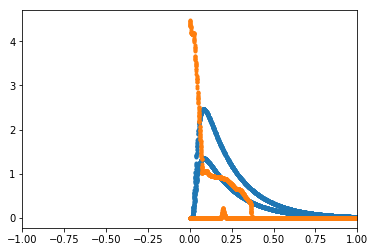

In [95]:
# Plot outcome
plt.plot(dataset['rt'], dataset['nf_likelihood'], '.')
plt.plot(dataset['rt'], my_predictions.flatten(), '.')
plt.xlim((-1,1))
plt.show()

In [86]:
my_predictions.flatten()

array([0.       , 1.7522136, 0.       , ..., 1.3948972, 0.       ,
       0.       ], dtype=float32)

In [87]:
len(features['v'])

10000